In [2]:
import matplotlib.pyplot as plt

def build_dots(xs, ys):
    plt.plot(xs, ys, 'r')
    plt.grid()
    plt.show()

## Basic approximation funcs

In [3]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def polynomial_second_degree(xs, a0, a1, a2):
    res = []
    for x in xs:
        res.append(a0*x**2 + a1*x + a2)
    return res

def exponent(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.exp(b*x))
    return res

def ln(xs, a, b):
    res = []
    for x in xs:
        res.append(a * math.log(x, math.exp(1)) + b)
    return res

def power(xs, a, b):
    res = []
    for x in xs:
        res.append(a*pow(x, b))
    return res

## Sums and eps

In [4]:
def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

In [5]:
def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

# a3, a2, a1
def square_approximation(xs, ys):
    left = np.array([[len(xs), sx(xs), sxx(xs)],
                             [sx(xs), sxx(xs), pow_n(xs, 3)],
                             [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

def exponent_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    res = linear_approximation(xs, new_y)
    res[0] = math.exp(res[0])
    return res

def power_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    res = linear_approximation(new_x, new_y)
    res[0] = math.exp(res[0])
    return res

def logarithmic_approximation(xs, ys):
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    return linear_approximation(new_x, ys)

---------------Linear approximation---------------
phi(x) = 1.5890069384215082x + 2.062033824804864
S = 1.242388069430062


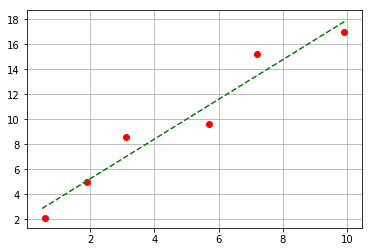

---------------Square approximation---------------
phi(x) = -0.056091123112573714x^2 + 2.171187675326826x + 1.137940476822263
S = 1.1474961300878699


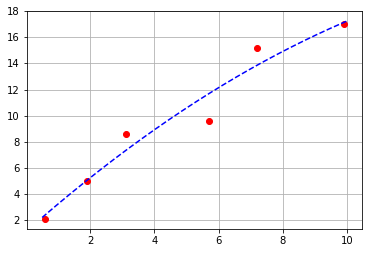

---------------Exponent approximation---------------
phi(x) = 1.2233350777100014 * e^(1.0990857716940792x)
S = 26575.517997106086


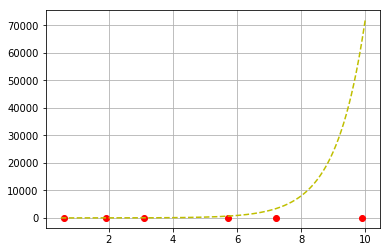

---------------Power approximation---------------
phi(x) = 2.1054550830260745 * x^1.1511712378355163
S = 58.75493711094093


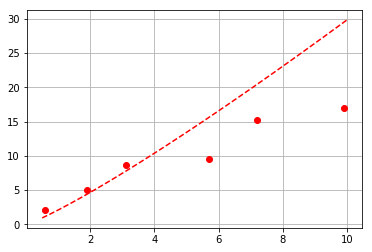

---------------Logarithm approximation---------------
phi(x) = 5.234938703343273 + 3.2407580898837556ln(x)
S = 1.75765928359338


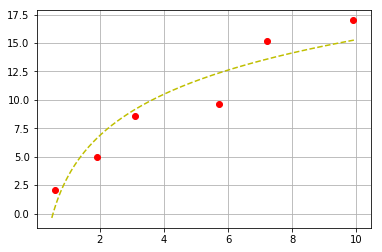

In [22]:
import numpy as np

xs = np.array([0.6, 1.9, 3.1, 5.7, 7.2, 9.9])
ys = [2.1, 5.0, 8.6, 9.6, 15.2, 17.0]

plot_x = np.array(np.arange(xs[0] - 0.1, xs[len(xs) - 1] + 0.1, step=0.01))

print("---------------Linear approximation---------------")

linear_c = linear_approximation(xs, ys)
ys_linear = linear(xs, linear_c[0], linear_c[1])


print(f"phi(x) = {linear_c[0]}x + {linear_c[1]}")
print(f"S = {standard_deviation(epsilon(ys, ys_linear))}")
plt.plot(xs, ys, 'ro',
         plot_x, linear(plot_x, linear_c[0], linear_c[1]), 'g--')
plt.grid()
plt.show()

print("---------------Square approximation---------------")

square_c = square_approximation(xs, ys)
ys_square = polynomial_second_degree(xs, square_c[2], square_c[1], square_c[0])

print(f"phi(x) = {square_c[2]}x^2 + {square_c[1]}x + {square_c[0]}")
print(f"S = {standard_deviation(epsilon(ys, ys_square))}")
plt.plot(xs, ys, 'ro',
         plot_x, polynomial_second_degree(plot_x, square_c[2], square_c[1], square_c[0]), 'b--')
plt.grid()
plt.show()

print("---------------Exponent approximation---------------")

exponent_c = exponent_approximation(xs, ys)
ys_exponent = exponent(xs, exponent_c[0], exponent_c[1])

print(f"phi(x) = {exponent_c[0]} * e^({exponent_c[1]}x)")
print(f"S = {standard_deviation(epsilon(ys, ys_exponent))}")
plt.plot(xs, ys, 'ro',
         plot_x, exponent(plot_x, exponent_c[0], exponent_c[1]), 'y--')
plt.grid()
plt.show()

print("---------------Power approximation---------------")

power_c = power_approximation(xs, ys)
ys_power = power(xs, power_c[1], power_c[0])

print(f"phi(x) = {power_c[0]} * x^{power_c[1]}")
print(f"S = {standard_deviation(epsilon(ys, ys_power))}")
plt.plot(xs, ys, 'ro',
         plot_x, power(plot_x, power_c[0], power_c[1]), 'r--')
plt.grid()
plt.show()

print("---------------Logarithm approximation---------------")

logarithm_c = logarithmic_approximation(xs, ys)
ys_logarithm = ln(xs, logarithm_c[0], logarithm_c[1])

print(f"phi(x) = {logarithm_c[0]} + {logarithm_c[1]}ln(x)")
print(f"S = {standard_deviation(epsilon(ys, ys_logarithm))}")
plt.plot(xs, ys, 'ro',
         plot_x, ln(plot_x, logarithm_c[0], logarithm_c[1]), 'y--')
plt.grid()
plt.show()
